# EDA #

In [41]:
# importamos las librerias
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import geopandas as gpd
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))


In [2]:
# cargamos el archivo que limpiamos en el ETL y lo procedemos a analizar
df_penetracion_int= pd.read_csv('df_int_penetracion_prov.csv')
df_penetracion_int

,Año,Trimestre,Provincia,Accesos por cada 100 hab,Accesos por cada 100 hogares
0,2014,4,Buenos Aires,17.01,56.09
1,2014,3,Buenos Aires,17.26,56.75
2,2014,2,Buenos Aires,16.79,55.06
3,2014,1,Buenos Aires,16.69,54.57
4,2014,4,Capital Federal,43.60,114.90
...,...,...,...,...,...
859,2022,1,Tierra Del Fuego,29.14,98.29
860,2022,4,Tucumán,15.12,61.04
861,2022,3,Tucumán,15.14,61.14
862,2022,2,Tucumán,14.69,59.31


In [3]:
# verificamos 
df_penetracion_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           864 non-null    int64  
 1   Trimestre                     864 non-null    int64  
 2   Provincia                     864 non-null    object 
 3   Accesos por cada 100 hab      864 non-null    float64
 4   Accesos por cada 100 hogares  864 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 33.9+ KB


## Variables Categoricas ##
### outliers ###

Se realiza la busqueda de datos con valores atípicos y se analiza si es necesario eliminarlos o combiarlos.

In [4]:
df_penetracion_int['Provincia'].unique()

array(['Buenos Aires', 'Capital Federal', 'Catamarca', 'Chaco', 'Chubut',
       'Corrientes', 'Córdoba', 'Entre Ríos', 'Formosa', 'Jujuy',
       'La Pampa', 'La Rioja', 'Mendoza', 'Misiones', 'Neuquén',
       'Río Negro', 'Salta', 'San Juan', 'San Luis', 'Santa Cruz',
       'Santa Fe', 'Santiago Del Estero', 'Tierra Del Fuego', 'Tucumán'],
      dtype=object)

Podemos verificar que no hay valores atipicos  

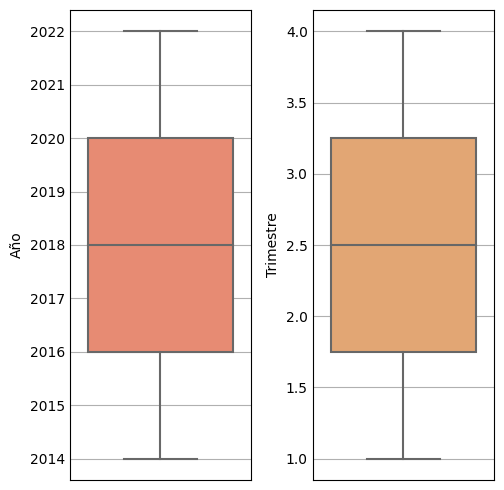

In [72]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1) 
sns.boxplot(data=df_penetracion_int, y='Año', color = "#FA8060")
plt.ylabel('Año')

plt.subplot(1, 4, 2) 
sns.boxplot(data=df_penetracion_int, y='Trimestre', color = "#F4A462")
plt.ylabel('Trimestre')

plt.tight_layout()



plt.show()

Se aprecia que no hay valores fuera de lo normal 

# Variables Numericas #

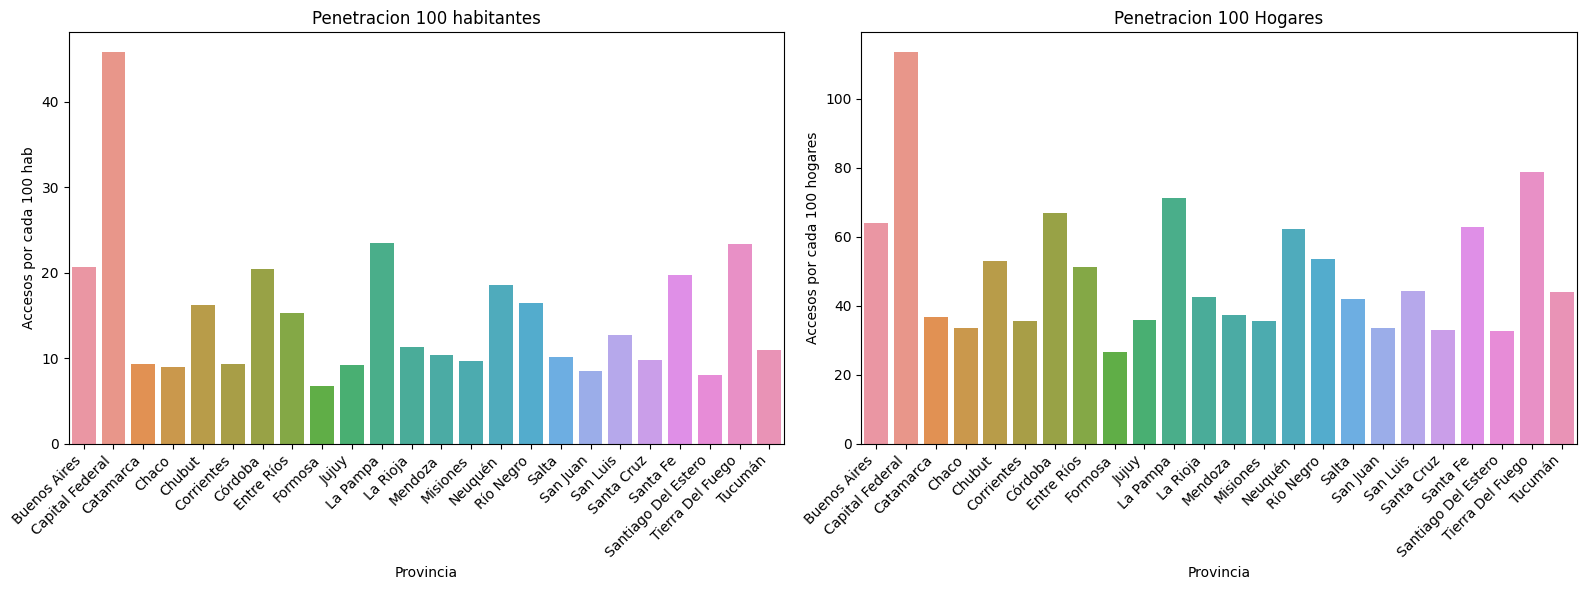

In [49]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Primer subgráfico
sns.barplot(data=df_penetracion_int, x="Provincia", y="Accesos por cada 100 hab", errorbar=None, ax=ax[0])
ax[0].set_title('Penetracion 100 habitantes')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right")

sns.barplot(data=df_penetracion_int, x="Provincia", y="Accesos por cada 100 hogares", errorbar=None, ax=ax[1])
ax[1].set_title('Penetracion 100 Hogares')
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha="right")

# Ajusta el diseño de los subgráficos
plt.tight_layout()

# Muestra la figura con subgráficos
plt.show()


Podemos ver la penetracion del internet por Provincia destacando que Capital Federal lidera el ingreso por habitantes y adicionalmente 
en la penetracion por hogares vemos como sobrepasa el maximo, esto es indicativo que en Capital Federal hay hogares en los que tienen mas de   una conexion  a  internet; Esto podria deberse a la densidad de poblacion registrada que para el ultimo censo del año 2022  es de     15.155,96 habitantes por km² 

In [32]:
# Cargamos nuestro segundo archivo
df_int_acve_pro= pd.read_csv('df_int_acve_pro.csv')
df_int_acve_pro

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total_x,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total_y
0,2022,4,Buenos Aires,325908.0,2767247.0,1499149.0,129910.0,72451.0,4794665.0,28.934,23.347,259866.0,281.550,244.555,98.670,3760109.0,97.634,4794665.0
1,2022,4,Capital Federal,138753.0,1238196.0,138548.0,4603.0,31826.0,1551926.0,516.000,5.096,31320.0,64.653,36.336,8.116,1299117.0,106.772,1551926.0
2,2022,4,Catamarca,8952.0,10998.0,47337.0,1379.0,2243.0,70909.0,71.000,315.000,2716.0,5.028,4.638,3.122,52739.0,2.280,70909.0
3,2022,4,Chaco,24582.0,61265.0,47285.0,7957.0,2574.0,143663.0,461.000,771.000,16067.0,17.846,6.704,3.039,94866.0,3.909,143663.0
4,2022,4,Chubut,45450.0,73923.0,9815.0,30721.0,8850.0,168759.0,109.000,1.614,46457.0,31.007,34.728,15.770,19048.0,20.026,168759.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,2014,1,Santa Cruz,18927.0,100.0,381.0,4092.0,3264.0,26764.0,161.000,1.625,24972.0,1.000,1.000,0.000,0.0,0.000,26760.0
860,2014,1,Santa Fe,322662.0,174296.0,3059.0,5951.0,644.0,506612.0,8.456,124.468,345225.0,20.328,6.845,23.000,668.0,0.000,506013.0
861,2014,1,Santiago Del Estero,32567.0,3598.0,19.0,915.0,34.0,37133.0,1.234,10.531,22817.0,2.422,109.000,0.000,0.0,0.000,37113.0
862,2014,1,Tierra Del Fuego,21618.0,2837.0,648.0,1.0,2934.0,28038.0,12.000,607.000,30902.0,6.000,0.000,0.000,0.0,0.000,31527.0


In [33]:
df_int_acve_pro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  864 non-null    int64  
 1   Trimestre            864 non-null    int64  
 2   Provincia            864 non-null    object 
 3   ADSL                 864 non-null    float64
 4   Cablemodem           864 non-null    float64
 5   Fibra óptica         864 non-null    float64
 6   Wireless             864 non-null    float64
 7   Otros                864 non-null    float64
 8   Total_x              864 non-null    float64
 9   HASTA 512 kbps       864 non-null    float64
 10  + 512 Kbps - 1 Mbps  864 non-null    float64
 11  + 1 Mbps - 6 Mbps    864 non-null    float64
 12  + 6 Mbps - 10 Mbps   864 non-null    float64
 13  + 10 Mbps - 20 Mbps  864 non-null    float64
 14  + 20 Mbps - 30 Mbps  864 non-null    float64
 15  + 30 Mbps            864 non-null    flo

In [55]:
# Aggrupamos los datos en función de la columna 'Año' y obtener los valores totales de cada una de las tecnologías 
# especificadas  ('ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros') en cada año. .

Totaltc =df_int_acve_pro.groupby(['Año'])[['ADSL','Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum().reset_index()


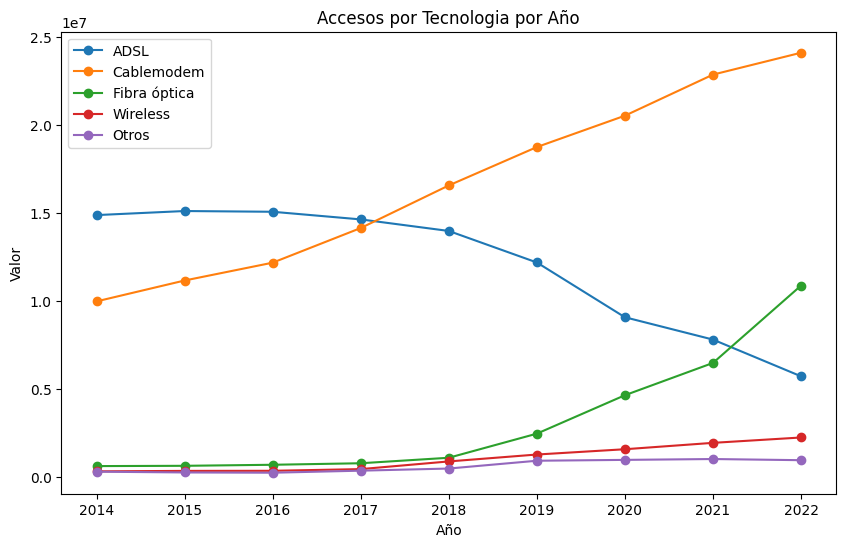

In [56]:

df = Totaltc

# Configurar el gráfico de líneas múltiples
plt.figure(figsize=(10, 6))

# Iterar a través de las columnas del DataFrame y trazar cada línea
for columna in df.columns[1:]:
    plt.plot(df['Año'], df[columna], label=columna, marker='o')

# Agregar etiquetas y título
plt.xlabel('Año')
plt.ylabel('Valor')
plt.title('Accesos por Tecnologia por Año')
plt.legend()

# Mostrar el gráfico
plt.show()



Podemos apreciar el incremento experimentado por cablemodem y Fibra óptica en los ultimos años, estas tecnologias ofrecen mayor eficiencia para conexion a internet por lo que no es de extrañar que los usuarios las escojan de igual forma vemos como ADSL una tecnologia mas antigua a perdido terreno experimentando una contracion en su uso. Es importante señalar que la Fibra óptica es la que ofrece mayor eficiencia y velocidad; su crecimiento puede llegar a superar a cable modem ya que el mismo ENACOM a destinada para el Proyecto de Despliegue y Extensión de la Red Federal de Fibra Óptica (Refefo) en las provincias de Jujuy, Salta y Tucumán a $ 2.500 millones, a través de la Resolución 1550/2023, para incrementa el monto del programa, lanzado en agosto de 2022 y ejecutado por Arsat. Además busca fomentar la inversión pública y privada en la expansión de los servicios.

In [36]:
# Agrupamos por Año y calculamos la suma de cada columna por año 
TotalVE=df_int_acve_pro.groupby(['Año'])[['HASTA 512 kbps','+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps',
                                        '+ 10 Mbps - 20 Mbps','+ 20 Mbps - 30 Mbps','+ 30 Mbps', 'OTROS']].sum().reset_index()

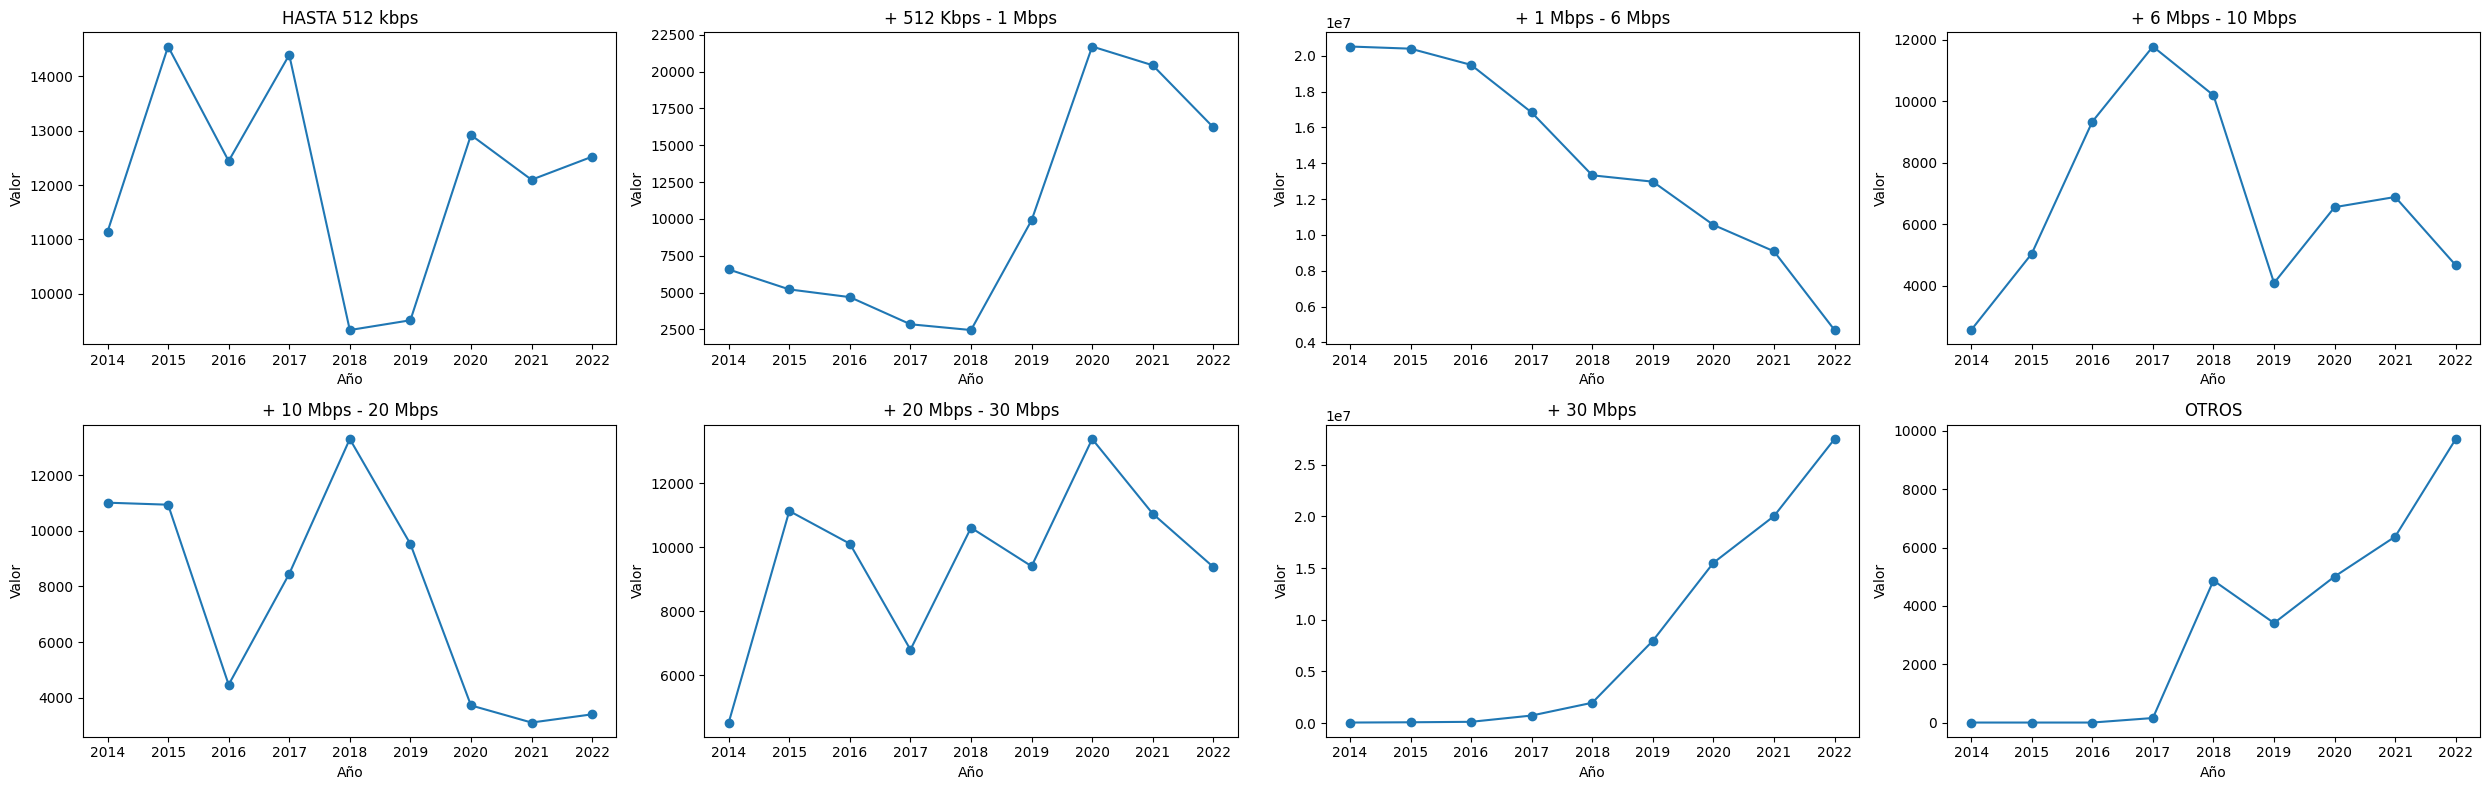

In [38]:
df=TotalVE
# Configurar subgráficos
num_columnas = 4
num_filas = (len(df.columns[1:]) + num_columnas - 1) // num_columnas  
fig, axes = plt.subplots(nrows=num_filas, ncols=num_columnas, figsize=(25, 8))

# Iterar a través de las columnas del DataFrame y trazar cada línea en un subplot
for i, columna in enumerate(df.columns[1:]):
    row = i // num_columnas
    col = i % num_columnas
    
    axes[row, col].plot(df['Año'], df[columna], marker='o')
    axes[row, col].set_title(columna)
    axes[row, col].set_xlabel('Año')
    axes[row, col].set_ylabel('Valor')

plt.tight_layout() 

# Mostrar el gráfico
plt.show()


Las graficas nos muestran la evolucion de la velocidad con el paso del tiempo, destacando que el aumento de conexiones a velocidades mayores en los ultimos años y esto no es de extrañar debido a la observacion del grafico anterior donde las tecnologias nuevas han ganado terreno aumentando de esta forma la velocidad de conexion.

In [39]:
# Cargamos nuestros datos 
df_int_tv_mv= pd.read_csv('df_anual_int_tv_mv.csv')
df_int_tv_mv.head()

,Año,Trimestre,Accesos internet 100 hogares,Accesos internet 100 hab,Accesos TV por suscripción por cada 100 hab,Accesos TV satelital por cada 100 hab,Accesos TV por suscripción por cada 100 hogares,Accesos TV satelital por cada 100 hogares,Accesos movil 100 hab
0,2022,4,77.21,24.15,16.55,3.96,52.90,12.66,12.865
1,2022,3,76.64,23.95,16.56,4.46,52.97,14.27,12.798
2,2022,2,75.97,23.72,16.55,4.47,53.01,14.31,12.795
3,2022,1,73.88,23.05,16.41,4.45,52.61,14.25,12.837
4,2021,4,73.18,22.81,16.52,4.37,52.99,14.02,12.844


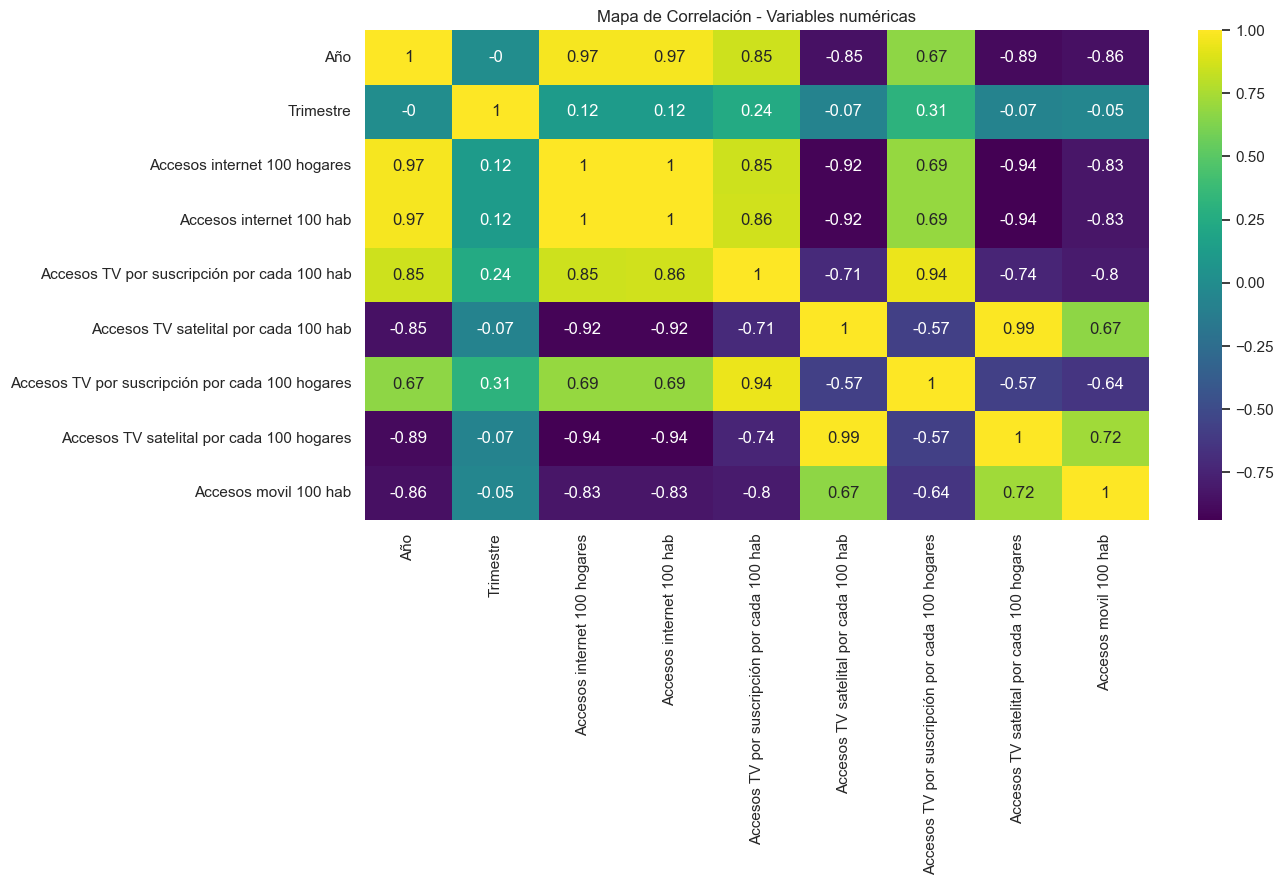

In [150]:
# Generamos un mapa de calor con las correlaciones de los todos los datos que contengan números 
dataNumerica = df_int_tv_mv.select_dtypes(include=['number']) 
corr = dataNumerica.corr().round(2)

plt.figure(figsize=(10,5))
sns.heatmap(corr, cmap="viridis", annot=True)
plt.title('Mapa de Correlación - Variables numéricas')
plt.show()

Este grafico se busca establecer una relacion entre los accesos a internet y los servicios conexos, en este sentido podemos notar como el ingreso a internet por cada 100 hogares muestra una fuerte relacion con el ingreso a tv por suscripcion siendo estos dos servicios conjuntos y que dado el crecimiento de conexion cable modem a incrementado su penetracion es un resultado esperado.

In [44]:
df_ingresos= pd.read_csv('df_ingresos.csv')
df_ingresos.head()

,Año,Trimestre,Ingresos (miles de pesos),Ingresos (miles de $),Ingresos TV por suscripción (miles de $),Ingresos TV satelital (miles de $)
0,2022,4,72443482.99,204796575.00,62432903.15,29721126.94
1,2022,3,64086784.33,180356862.00,52399891.49,27073190.89
2,2022,2,60419500.62,153032313.00,46322065.49,23559484.83
3,2022,1,55219313.01,130454676.00,42113438.81,21268086.24
4,2021,4,45467887.17,127389786.00,38273391.80,18038065.44


In [57]:
# Definir un diccionario de mapeo para los nuevos nombres de columnas
mapeo_nombres_columnas = {'Ingresos (miles de pesos)': 'Ingresos internet en $', 'Ingresos (miles de $)': 'Ingresos movil $'}
df_ingresos = df_ingresos.rename(columns=mapeo_nombres_columnas)

df_ingresos.head()


,Año,Trimestre,Ingresos internet en $,Ingresos movil $,Ingresos TV por suscripción (miles de $),Ingresos TV satelital (miles de $)
0,2022,4,72443482.99,204796575.00,62432903.15,29721126.94
1,2022,3,64086784.33,180356862.00,52399891.49,27073190.89
2,2022,2,60419500.62,153032313.00,46322065.49,23559484.83
3,2022,1,55219313.01,130454676.00,42113438.81,21268086.24
4,2021,4,45467887.17,127389786.00,38273391.80,18038065.44
